# Bioinformatics Algorithms, Week 2

In Week 1, we attempted but did not succeed in finding finding the *ori* region in the genome of *E. coli* by looking for potential 9-mer *DnaA* box clumps. This week, we will try a different approach.

### More About DNA Replication

When it is time for DNA to be replicated, the complementary strands of DNA unravel, starting at *ori*. Replication begins when a short complementary segment called a **primer** anneals to a single-stranded section of the unraveling DNA and allows DNA polymerase to begin working. As the strands unwind and complementary strands begin construction, they form two **replication forks**. The replication forks travel along the bacterial chromosome until they meet at the **replication terminus** and the previously-together complementary strands separate completely. At this point, replication is complete and there are two semiconserved copies of the double-stranded chromosome.

Importantly, DNA polymerases can only traverse a single-stranded DNA in the 3' to 5' direction. This means that on the **reverse half-strand** (*ori* to *ter*, moving 3' to 5', **leading half-strand**), the DNA polymerase does not have to stop as long as the replication fork keeps widening. On the **forward half-strand** (*ter* to *ori*, moving 5' to 3', **lagging half-strand**), however, the DNA polymerase must transcribe short stretches called **Okazaki fragments** at a time, and wait for the replication fork to widen (~2000bp or so) so that a new primer can anneal upstream. In the diagram below, the forward (lagging) half-strand is thick and the reverse (leading) half-strand is thin.

<img src="http://bioinformaticsalgorithms.com/images/Replication/okazaki.png" width=400px />

Eventually, Okazaki fragments are sewn together by **DNA ligase** to form completely intact daughter chromosomes. 

#### G/C content in the half-strands
The nature of DNA replication means that the leading half-strand lives its life double-stranded a lot more than the lagging half-strand. This difference manifests at the molecular level in the G/C contents of the leading and lagging half-strands. Because cytosine readily undergoes methylation and deamination into thymine, and deamination rates rise 100-fold when a DNA is single-stranded, the lagging strand eventually accumulates a loss of cytosine. And, as the C-G base pairs are subsituted by T-A base pairs as a result, the leading strand, which is synthesized with the lagging strand as its template, accumulates a loss of guanine. 

<img src="http://bioinformaticsalgorithms.com/images/Replication/ecoli_frequency_difference.png" width=400px />

### The Skew Diagram

Exploiting these peculiar statistics, we can often infer the *ori* by plotting the relative G/C contents against the bin position in the genome. As we traverse the genome, we can keep track of the difference between G and C contents, and we can tell that, when the difference starts to increase, we are on the forward (lagging) half-strand; if the difference starts to decrease, we are on the reverse (leading) half-strand.

<img src="http://bioinformaticsalgorithms.com/images/Replication/increasing_decreasing_skew.png" width=400px />

We can artibrarily choose a position in the circular genome, and linearize it. Then, we can calculate the **skew** for the genome at any given position, and plot it on a diagram. Let's give it a shot.

In [40]:
def skew(pattern):
    skews = []
    skew = 0
    for i in pattern:
        if i == "G":
            skew += 1
            skews.append(skew)
        elif i == "C":
            skew -= 1
            skews.append(skew)
        else:
            skews.append(skew)
    return skews

In [41]:
f = open("E_coli.txt", "r")
E_coli_genome= f.read()
f.close()
skews = skew(E_coli_genome)

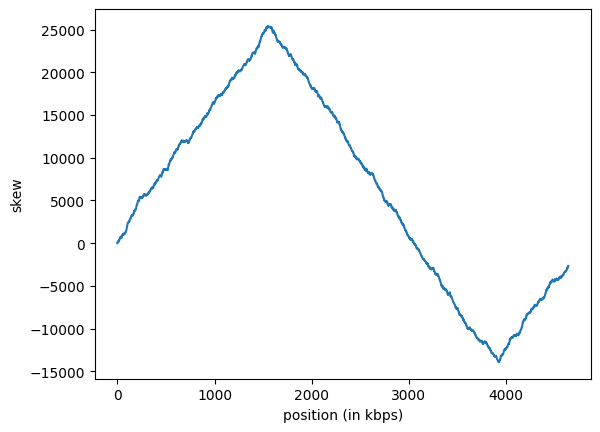

In [59]:
import matplotlib.pyplot as plt
import numpy as np

resampled_skews = skews[::1000] # too many values to plot reasonably
x_positions = range(len(resampled_skews)) 

plt.plot(x_positions, resampled_skews)

plt.ylabel("skew")
plt.xlabel("position (in kbps)")
plt.show()

Nice! It looks like the *ter* is between 1000 and 2000 kbps, and the *ori* is just below 4000 kbps. But, to find the exact position of *ori*, we have to find the position of the minimum skew. 

**Minimum Skew Problem**: *Find a position in a genome where the skew diagram attains a minimum.*
- **Input**: A DNA string *Genome*.
- **Output**: All integer(s) *i* minimizing Skew<sub>i</sub> (*Genome*) among all values of *i* (from 0 to |*Genome*|).
